In [1]:
# importing depedencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy as st
import numpy as np
import hvplot.pandas
import geopandas as gpd
import requests
import datetime
import json
import folium
import pymongo
import plotly.graph_objects as go
import imageio.v2 as imageio
from pprint import pprint

### import data

In [2]:
# Import Fire_data Polygon Shape data, fire_data.json (from the resources folder in storage) 
with open("resources/fire_data.json", "r") as f:
    firedata = json.load(f)
    fire_polygon_S_df = gpd.GeoDataFrame.from_features(firedata,crs='EPSG:4617')
    print(len(fire_polygon_S_df))
    print(fire_polygon_S_df.head())

6065
                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
1  MULTIPOLYGON Z (((-114.97290 49.01062 0.00000,...         BC  2016-N10016   
2  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
3  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
4  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      5   13  2016-05-13      None     None  ...      None   
1     None  2016      4   20  2016-04-20      None     None  ...      None   
2     None  2016      4   13  2016-04-13      None     None  ...      None   
3     None  2016      4    5  2016-04-05      None     None  ...      None   
4     None  2016      4    2  2016-04-02      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS

In [3]:
# Connecting to the MongoDB database (i.e. loading the Fire_data dataset through MongoDB)
def process_data():   
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["forestFireProject_db"]
    collection = db["ForestFirePolygons"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    fire_polygon_M_df = gpd.GeoDataFrame.from_features(data,crs='EPSG:4617')
    print(fire_polygon_M_df.head())
process_data()

6065
                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
1  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
2  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
3  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   
4  POLYGON Z ((-121.57530 50.21258 0.00000, -121....         BC  2016-K70148   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      4    5  2016-04-05      None     None  ...      None   
1     None  2016      5   13  2016-05-13      None     None  ...      None   
2     None  2016      4   13  2016-04-13      None     None  ...      None   
3     None  2016      4    2  2016-04-02      None     None  ...      None   
4     None  2016      6   30  2016-06-30      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS

In [4]:
# Import Fire Point Data (for large fires), fire_point_data.txt fire_data.json (from the resources folder in storage) 
fire_point_df =  pd.read_csv('resources/fire_point_data.txt')
fire_point_data_S_gdf = gpd.GeoDataFrame(fire_point_df, geometry=gpd.points_from_xy(fire_point_df.LONGITUDE, fire_point_df.LATITUDE), crs='EPSG:4617')
print(len(fire_point_data_S_gdf))
print(fire_point_data_S_gdf.head())

19115
   FID SRC_AGENCY      FIRE_ID FIRENAME  LATITUDE  LONGITUDE  YEAR  MONTH  \
0    0         BC  1950-G00026             59.876   -131.922  1950      6   
1    1         BC  1951-R00097             59.760   -132.808  1951      7   
2    2         BC  1950-G00035             57.463   -122.816  1950      6   
3    3         BC  1953-G00043             57.684   -121.925  1953      5   
4    4         BC  1950-R00029             59.318   -133.228  1950      6   

   DAY             REP_DATE  ...           CFS_REF_ID CFS_NOTE1 CFS_NOTE2  \
0    4  1950-06-04 00:00:00  ...  BC-1950-1950-G00026                       
1   15  1951-07-15 00:00:00  ...  BC-1951-1951-R00097                       
2   14  1950-06-14 00:00:00  ...  BC-1950-1950-G00035                       
3    1  1953-05-01 00:00:00  ...  BC-1953-1953-G00043                       
4   22  1950-06-22 00:00:00  ...  BC-1950-1950-R00029                       

              ACQ_DATE SRC_AGY2 ECOZONE ECOZ_REF          ECOZ_NAME 

In [5]:
# Connecting to the MongoDB database (i.e. loading the Fire_Point dataset through MongoDB)
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["forestFireProject_db"]
collection = db["ForestFirePoints"]
cursor = collection.find()
data = list(cursor)
firepoint_df = pd.DataFrame(data)
print(len(data))
fire_point_data_M_gdf = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(firepoint_df.LONGITUDE, firepoint_df.LATITUDE),crs='EPSG:4617')
print(fire_point_data_M_gdf.head())
process_data()

19115
                        _id  FID SRC_AGENCY      FIRE_ID FIRENAME  LATITUDE  \
0  65e3eb5a6160fc6052a53a23    0         BC  1950-G00026             59.876   
1  65e3eb5a6160fc6052a53a24    1         BC  1951-R00097             59.760   
2  65e3eb5a6160fc6052a53a25    2         BC  1950-G00035             57.463   
3  65e3eb5a6160fc6052a53a26    4         BC  1950-R00029             59.318   
4  65e3eb5a6160fc6052a53a27    5         BC  1951-R00101             59.713   

   LONGITUDE  YEAR  MONTH  DAY  ...           CFS_REF_ID CFS_NOTE1 CFS_NOTE2  \
0   -131.922  1950      6    4  ...  BC-1950-1950-G00026                       
1   -132.808  1951      7   15  ...  BC-1951-1951-R00097                       
2   -122.816  1950      6   14  ...  BC-1950-1950-G00035                       
3   -133.228  1950      6   22  ...  BC-1950-1950-R00029                       
4   -134.172  1951      8    7  ...  BC-1951-1951-R00101                       

              ACQ_DATE  SRC_AGY2 ECOZO

In [60]:
 print(fire_point_data_M_gdf[fire_point_data_M_gdf["SIZE_HA"].isna()].head())

Empty GeoDataFrame
Columns: [_id, FID, SRC_AGENCY, FIRE_ID, FIRENAME, LATITUDE, LONGITUDE, YEAR, MONTH, DAY, REP_DATE, ATTK_DATE, OUT_DATE, DECADE, SIZE_HA, CAUSE, PROTZONE, FIRE_TYPE, MORE_INFO, CFS_REF_ID, CFS_NOTE1, CFS_NOTE2, ACQ_DATE, SRC_AGY2, ECOZONE, ECOZ_REF, ECOZ_NAME, ECOZ_NOM, geometry]
Index: []

[0 rows x 29 columns]


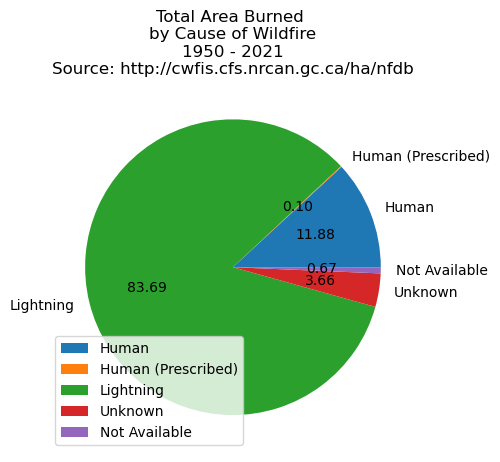

In [11]:
area_by_cause_df = fire_point_data_M_gdf.groupby("CAUSE")["SIZE_HA"].sum().dropna()
plt.title("Total Area Burned \nby Cause of Wildfire\n1950 - 2021\nSource: http://cwfis.cfs.nrcan.gc.ca/ha/nfdb")
area_by_cause_df.index = area_by_cause_df.index.map({
    "H": "Human",
    "H-PB": "Human (Prescribed)",
    "L": "Lightning",
    "U": "Unknown",
    "n/a": "Not Available"
  })
plt.pie(area_by_cause_df, labels=area_by_cause_df.index, autopct="%.2f")
plt.legend(loc="lower left")
plt.show()


In [71]:
print(fire_point_data_M_gdf["CAUSE"].unique())

['H' 'L' 'U' 'H-PB' 'n/a']


In [74]:
# Obtaining weather data through weather APIs 
WEATHER_API_BASE = "https://api.weather.gc.ca"
def get_weather_for_day(date: datetime.datetime) -> gpd.GeoDataFrame:
  """
  Load weather data from all stations for a single day.
  """
  API = f"{WEATHER_API_BASE}/collections/climate-daily/items"

  date_start = date.__format__("%Y-%m-%d 00:00:00")
  date_end = date.__format__("%Y-%m-%d 11:59:59")

  result = requests.get(API, params={
    "datetime": f"{date_start}/{date_end}",
    "f": "json",
    "startindex": "0",
    "sortby": "LOCAL_YEAR,LOCAL_DAY",
    "limit": "5000"
  })

  data = result.json()
  features = data["features"]
  weather_df = gpd.GeoDataFrame.from_features(features)

  return weather_df

def get_fires_for_day(date: datetime.datetime) -> pd.DataFrame:
  """
  Get a subset of the fire points data for a single day.
  """
  df = fire_point_data_M_gdf[(fire_point_data_M_gdf["YEAR"] == date.year) & (fire_point_data_M_gdf["MONTH"] == date.month) & (fire_point_data_M_gdf["DAY"] == date.day)]
  return df

def make_weather_and_fire_animation(start_date, end_date):
  """
  Make an animation of weather and fire data over a range of dates.
  """
  images = []
  # Iterate through days in range.
  for i, date in enumerate(pd.date_range(start_date, end_date)):
    print(f"Processing date: {date}")

    weather_for_day_df = get_weather_for_day(date)
    fires_for_date_df = get_fires_for_day(date)

    # Create a plot with all weather data color coded from blue-red (relative temperatures)
    # Overlay with the forest fires for that day, in black.
    fig, ax = plt.subplots()
    plt.title(f"Weather Data Overlaying Wildfire Points' Data \n{date}\n\nHigh Temperatures = Red markers; Cool Temperatures = Blue markers; \nWildfires = Black markers")
    plt.xlabel("Longitude")
    plt.ylabel('Latitude')
    weather_for_day_df.plot("MEAN_TEMPERATURE", cmap="coolwarm", ax=ax)
    ax.scatter(fires_for_date_df["LONGITUDE"], fires_for_date_df["LATITUDE"], color="black", s=10)
    
    # Save frame of animation to animations folder.
    image_path = f"./resources/animation/{i}.png"
    plt.savefig(image_path)
    image_buffer = imageio.imread(image_path)
    images.append(image_buffer)
    
    plt.close()

    imageio.mimsave('./resources/animation.gif',images, fps = 2)


#print(len(weather_df))
#print(len(fire_point_data_M_gdf))
#plt.show()
#ax.legend(loc='upper right')

In [75]:
START_DATE = datetime.datetime(2021, 5, 1)
END_DATE = datetime.datetime(2021, 5, 31)
make_weather_and_fire_animation(START_DATE, END_DATE)


Processing date: 2021-05-01 00:00:00
Processing date: 2021-05-02 00:00:00
Processing date: 2021-05-03 00:00:00
Processing date: 2021-05-04 00:00:00
Processing date: 2021-05-05 00:00:00
Processing date: 2021-05-06 00:00:00
Processing date: 2021-05-07 00:00:00
Processing date: 2021-05-08 00:00:00
Processing date: 2021-05-09 00:00:00
Processing date: 2021-05-10 00:00:00
Processing date: 2021-05-11 00:00:00
Processing date: 2021-05-12 00:00:00
Processing date: 2021-05-13 00:00:00
Processing date: 2021-05-14 00:00:00
Processing date: 2021-05-15 00:00:00
Processing date: 2021-05-16 00:00:00
Processing date: 2021-05-17 00:00:00
Processing date: 2021-05-18 00:00:00
Processing date: 2021-05-19 00:00:00
Processing date: 2021-05-20 00:00:00
Processing date: 2021-05-21 00:00:00
Processing date: 2021-05-22 00:00:00
Processing date: 2021-05-23 00:00:00
Processing date: 2021-05-24 00:00:00
Processing date: 2021-05-25 00:00:00
Processing date: 2021-05-26 00:00:00
Processing date: 2021-05-27 00:00:00
P

# Analysis: 

The analysis of total area burned by cause of wildfire shows that the wildfires caused by lightning, which represent about 20% of all wildfires by count (as shown under "Primary Causes of Wildfires"), account for most of the area burned (over 80%).  Please refer to the pie-chart "Total Area Burned by Cause of Wildfire - 1950 - 2021". 

Further, the animation on weather data (high temperatures) overlaying wildfire occurrences shows that wildfire activity rises with high temperatures.  It, therefore, supports the view that "rising temperatures promote the development of more storms capable of producing lightning (Source: Climate Atlas of Canada)".  

Climate scientists are forecasting, for every 1C increase in temperatures, the wildfire activity could increase by 12%.  In other words, the overall efforts to slow global warming would help mitigate the risk of wildfires. 